In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA**

In [20]:
df = pd.read_csv('diabetes.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [21]:
df.isnull().values.sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [23]:
target = df.Diabetes_binary
df2 = df.drop("Diabetes_binary", axis='columns')

In [24]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(df2, target)
target.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

# **Train test split**

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_ros, y_ros, test_size=0.2)
ytrain.value_counts()

Diabetes_binary
1.0    28377
0.0    28176
Name: count, dtype: int64

In [26]:
ytrain

38328    1.0
49313    1.0
18135    0.0
45603    1.0
42173    1.0
        ... 
34821    0.0
11394    0.0
65466    1.0
30878    0.0
19305    0.0
Name: Diabetes_binary, Length: 56553, dtype: float64

# **Random forest classifire**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [28]:
ypredict = rfc.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypredict)

0.733361623877219

# **Hyper Parameter**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

In [17]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params':{}
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params':{}
    },
    'decition_tree_classifier': {
        'model': DecisionTreeClassifier(criterion="gini", max_depth=3),
        'params':{}
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params':{}
    },
    'kmeans':{
        'model': KMeans(),
        'params':{}
    }
}

In [ ]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=2, return_train_score=False)
    clf.fit(xtrain, ytrain)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
parameters = pd.DataFrame(scores)
parameters

SVM

In [29]:
sv = svm.SVC(gamma='auto')
sv.fit(xtrain,ytrain)
sv.score(xtest,ytest)

0.7423438715609307

Random Forest Classifier

In [30]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.7347054247117901

Decision Tree Classifier

In [31]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3)
dtc.fit(xtrain,ytrain)
dtc.score(xtest,ytest)

0.7045052691137987

GaussianNB

In [32]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb.score(xtest,ytest)

0.7151142230709385

Kmeans

In [33]:
kmeans = KMeans(n_init='auto')
kmeans.fit(xtrain,ytrain)
kmeans.score(xtest,ytest)

-726204.6427086833

In [34]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Feature selection

In [35]:
df.corr()['Diabetes_binary']

Diabetes_binary         1.000000
HighBP                  0.381516
HighChol                0.289213
CholCheck               0.115382
BMI                     0.293373
Smoker                  0.085999
Stroke                  0.125427
HeartDiseaseorAttack    0.211523
PhysActivity           -0.158666
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
AnyHealthcare           0.023191
NoDocbcCost             0.040977
GenHlth                 0.407612
MentHlth                0.087029
PhysHlth                0.213081
DiffWalk                0.272646
Sex                     0.044413
Age                     0.278738
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64

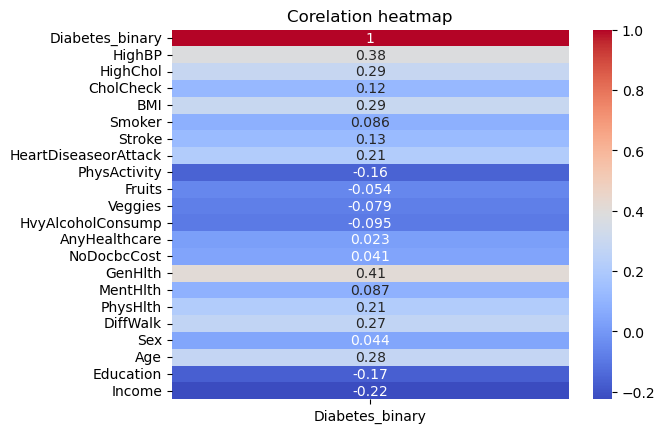

In [36]:
sns.heatmap(df.corr()[['Diabetes_binary']],annot=True,cmap='coolwarm')
plt.title('Corelation heatmap')
plt.show()

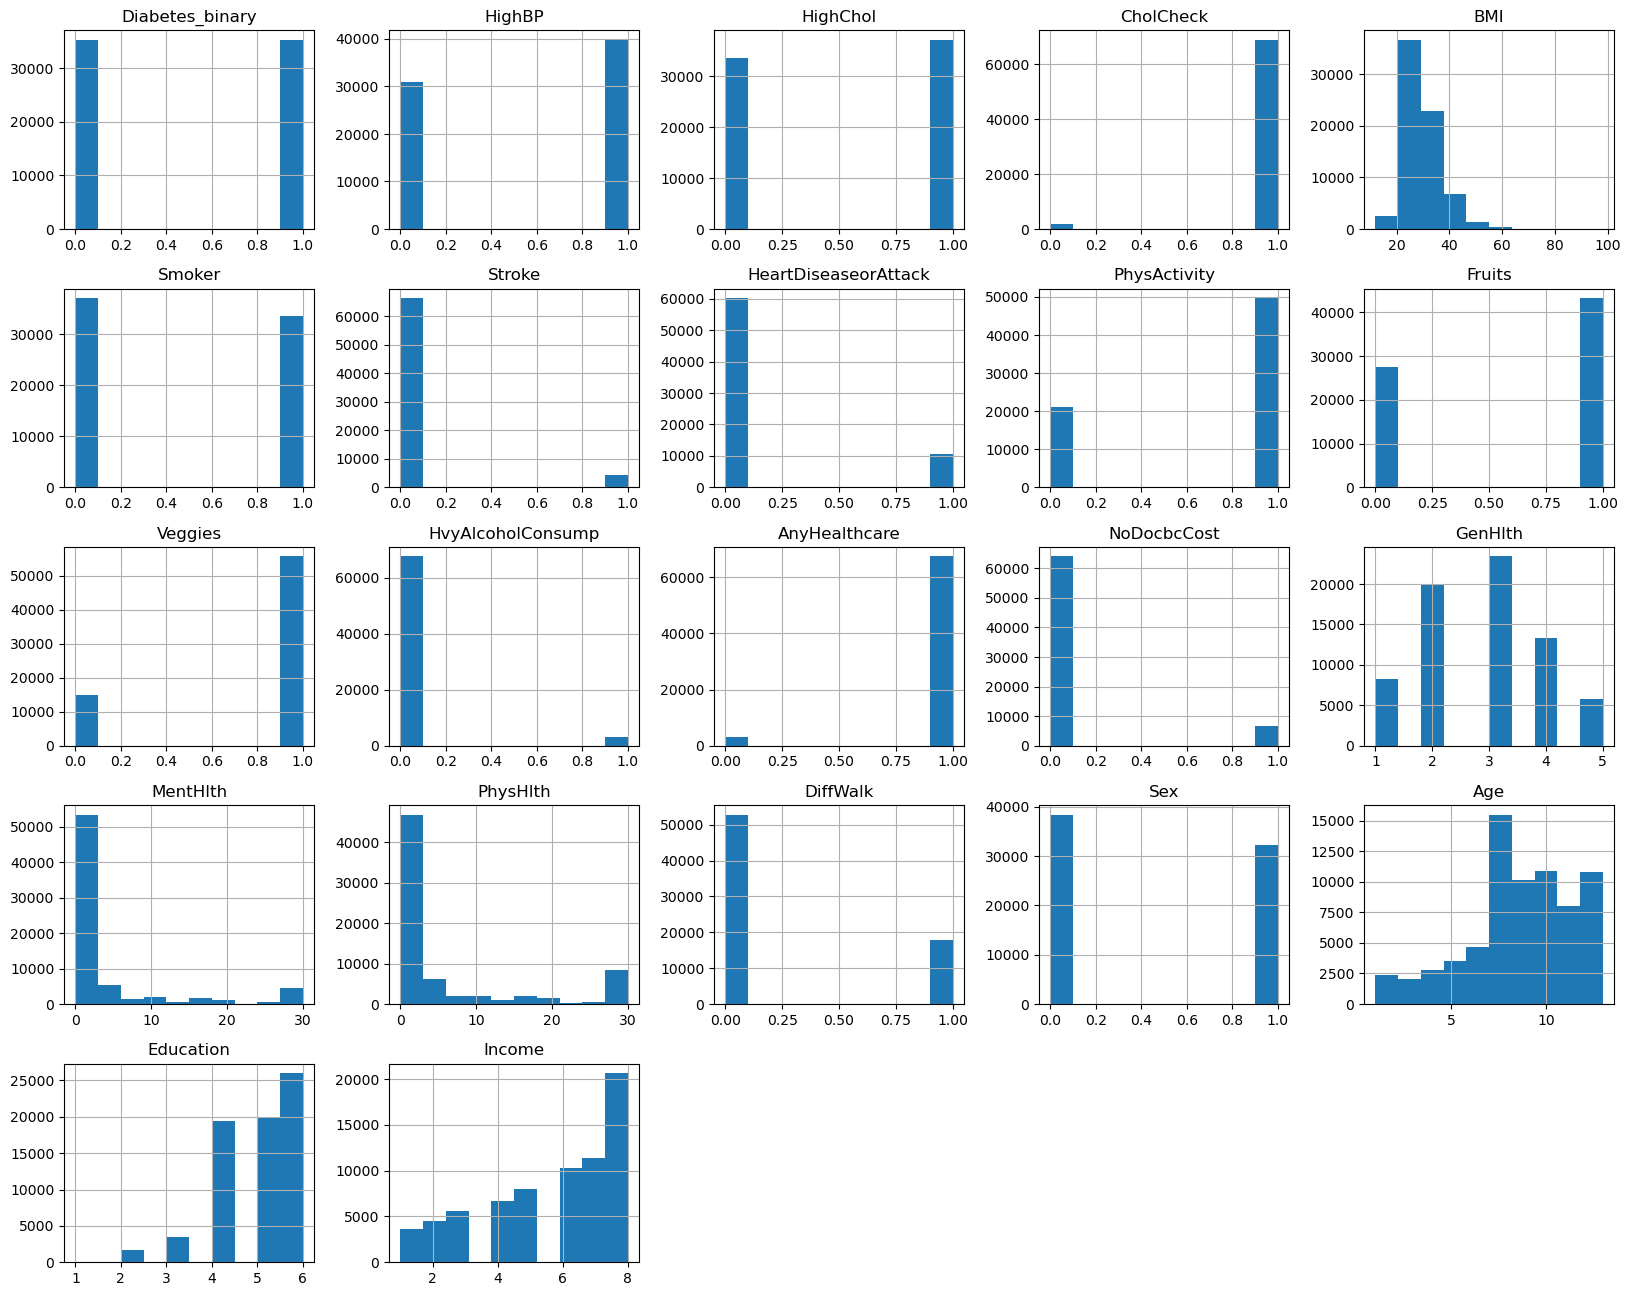

In [37]:
df.hist(figsize=(20,16))
plt.show()